In [ ]:
#install packages
# !apt install goal-bin python-goal python3-gdal
# !apt install python3-rtree #install python3-rtree Geopsndas requirement
# !pip install git+git://github.com/geopandas/geopandas/git #install geopandas
# !pip install descartes 

!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install descartes
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (14.9 MB/s)
Selecting previously unselected 

In [ ]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#read data and show header
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#read the capitals data and show the header
capitals = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


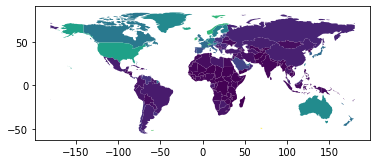

In [ ]:
#plot a Map of GDP per capita without using pyplot
world = world[(world.pop_est>0) & (world.name!="Antarctica")] #exclude negative popiulation and Antarctica
world["gdp_per_cap"] = world.gdp_md_est / world.pop_est
world.plot(column="gdp_per_cap")


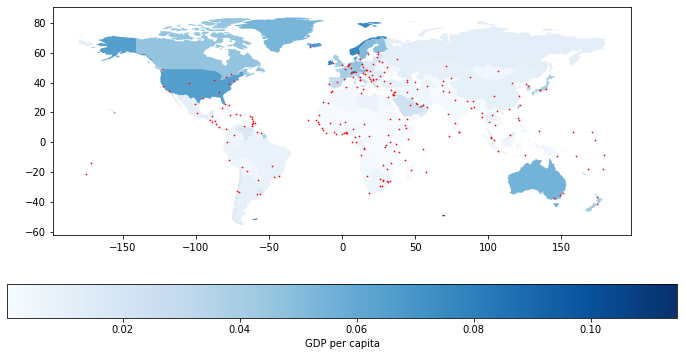

In [ ]:
#use pyplot to plot a wold map with capital markers and shaded by GDP per capita with scale bar
fig, ax = plt.subplots(figsize=(12,6))
world.plot(column="gdp_per_cap", cmap="Blues", ax=ax, legend=True, legend_kwds={"label": "GDP per capita", "orientation": "horizontal"})
capitals.plot(markersize=0.5, color="red", ax=ax)
plt.show()

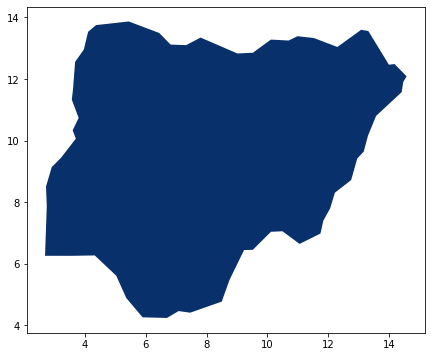

In [ ]:
#use to plot a specific country
fig, ax_nz = plt.subplots(figsize=(8,6))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Nigeria"].plot(cmap="Blues_r", ax=ax_nz)
plt.show()